In [2]:
# This is an example of the comparison of data cubes using the HOG technique
#
# Prepared by Juan D. Soler (soler@mpia.de)

import sys
sys.path.append('../')
from astrohog2d import *
from astrohog2d1v import *

import matplotlib.pyplot as plt
from astropy.io import fits

from scipy import ndimage
from rgbtools import *

In [3]:
# Load the cubes that you plan to compare
# Just for reference, I assume that the first index runs over the non-spatial coordinate
# Also assume that the cubes are spatially aligned and are reprojected into the same grid 

hdul = fits.open('../data/testcube1.fits')
cube1=hdul[0].data
hdul.close()
hdul = fits.open('../data/testcube2.fits')
cube2=hdul[0].data
hdul.close()

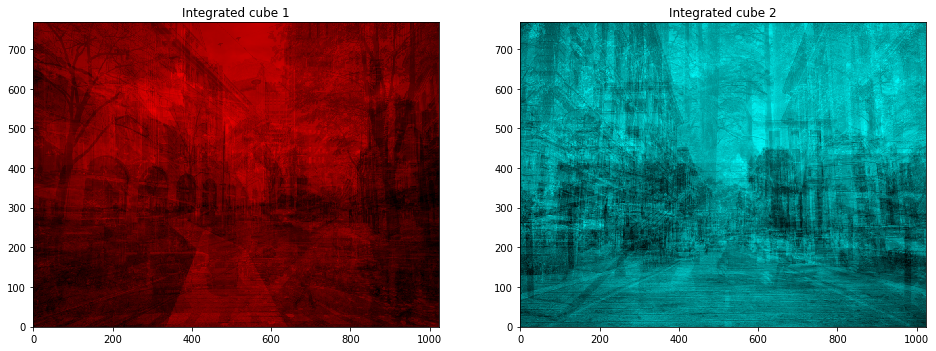

In [4]:
fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(cube1.sum(axis=0), origin='lower', cmap=redct())
ax[0].set_title('Integrated cube 1')
ax[1].imshow(cube2.sum(axis=0), origin='lower', cmap=tealct())
ax[1].set_title('Integrated cube 2')
plt.show()

In [5]:
# Here you select the size of your derivative kernel in pixels
ksz=10

In [6]:
# Here I define the masks for both cubes
# For the sake of simplicity, I'm only masking the edges of the cubes
sz1=np.shape(cube1)
mask1=1.+0.*cube1
mask1[:,0:ksz,:]=0.
mask1[:,sz1[1]-1-ksz:sz1[1]-1,:]=0.
mask1[:,:,0:ksz]=0.
mask1[:,:,sz1[2]-1-ksz:sz1[2]-1]=0.
sz2=np.shape(cube2)
mask2=1.+0.*cube2
mask2[:,0:ksz,:]=0.
mask2[:,sz2[1]-1-ksz:sz2[1]-1,:]=0.
mask2[:,:,0:ksz]=0.
mask2[:,:,sz2[2]-1-ksz:sz2[2]-1]=0.

In [7]:
# Here you define the channel ranges over which you want to compare the cubes
zmin1=0
zmax1=sz1[0]-1
zmin2=0
zmax2=sz2[0]-1

In [8]:
# Run the HOG
corrplane, corrcube, scube1, scube2 = HOGcorr_ppvcubes(cube1, cube2, zmin1, zmax1, zmin2, zmax2, ksz=ksz, mask1=mask1, mask2=mask2)

Computing HOG correlation
6 6
0 0
0 1
0 2
0 3
0 4
0 5
1 0
1 1
1 2
1 3
1 4
1 5
2 0
2 1
2 2
2 3
2 4
2 5
3 0
3 1
3 2
3 3
3 4
3 5
4 0
4 1
4 2
4 3
4 4
4 5
5 0
5 1
5 2
5 3
5 4
5 5


In [9]:
# The outputs are: 
# 1. 'corrplane' an array with all of the metrics to evaluate the correlation between the cubes
np.shape(corrplane)

(12, 6, 6)

In [10]:
# 2. 'corrcube', which is the array containing all the relative orientation angles between gradients
np.shape(corrcube)

(6, 6, 768, 1024)

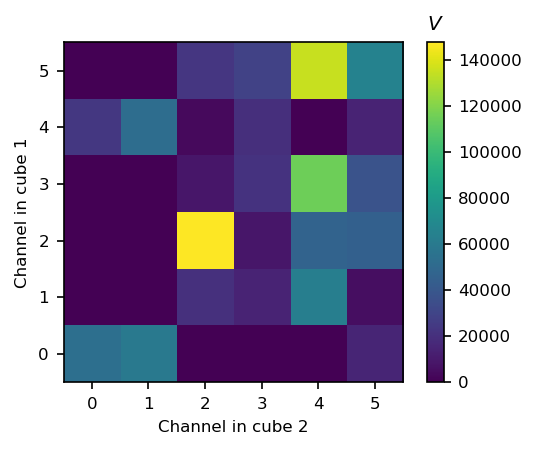

In [29]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.
vplane =corrplane[2]

fig, ax = plt.subplots(1,1, figsize=(4., 3.), dpi=150)
plt.rc('font', size=8)
im=plt.imshow(vplane,origin='lower',clim=[0.,np.max(vplane)],interpolation='None')
plt.xlabel('Channel in cube 2')
plt.ylabel('Channel in cube 1')
cbl=plt.colorbar(im)
cbl.ax.set_title(r'$V$')
plt.show()

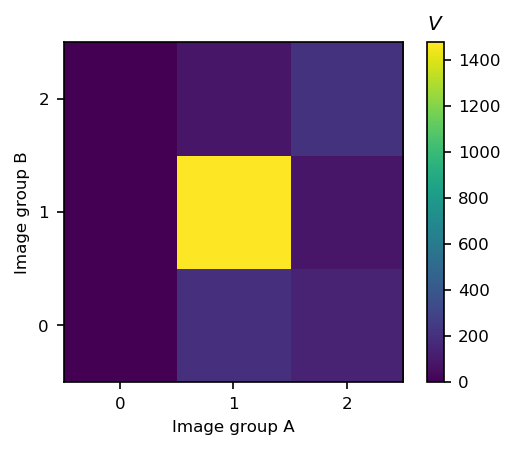

In [25]:
# Here for example, we show the projected Rayleight statistic (V)
# Large V values indicate that the angle distribution is not flat and is centred on zero
# V values around zero correspond to a flat angle distribution.
vplane =corrplane[2]

fig, ax = plt.subplots(1,1, figsize=(4., 3.), dpi=150)
plt.rc('font', size=8)
im=plt.imshow(vplane[1:4,1:4]/100.,origin='lower',clim=[0.,np.max(vplane/100.)],interpolation='None')
plt.xlabel('Image group A')
plt.ylabel('Image group B')
plt.xticks([0,1,2])
plt.yticks([0,1,2])
cbl=plt.colorbar(im)
cbl.ax.set_title(r'$V$')
plt.show()

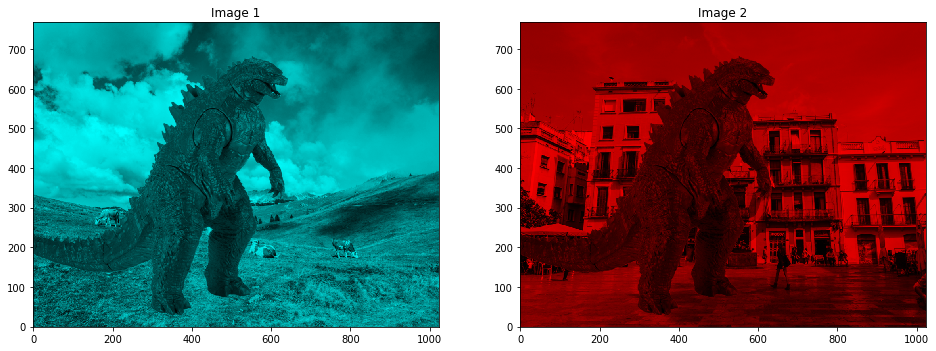

In [11]:
# Plot the pair of channels with the highest spatial correlations
indmax1, indmax2 =(vplane == np.max(vplane[np.isfinite(vplane)])).nonzero()

fig, ax = plt.subplots(1,2, figsize=(16., 12.))
ax[0].imshow(cube1[indmax1[0],:,:], origin='lower', cmap=tealct())
ax[0].set_title('Image 1')
ax[1].imshow(cube2[indmax2[0],:,:], origin='lower', cmap=redct())
ax[1].set_title('Image 2')
plt.show()


In [12]:
np.abs(corrcube[indmax1[0],indmax2[0],:,:])

array([[ 1.27530944,  1.33784699,  1.3914907 , ...,  1.25643456,
         1.26214767,  1.25121737],
       [ 1.26418841,  1.32581961,  1.3782202 , ...,  1.31289136,
         1.29708242,  1.26850033],
       [ 1.26862466,  1.32948112,  1.38065922, ...,  1.35854959,
         1.3248316 ,  1.28184569],
       ..., 
       [ 0.8273114 ,  0.86407435,  0.89665288, ...,  0.93206346,
         0.92343634,  0.92690152],
       [ 0.89007467,  0.92721957,  0.95975345, ...,  0.88553274,
         0.87968987,  0.88643825],
       [ 0.95949072,  0.99706739,  1.02957094, ...,  0.83459699,
         0.83146536,  0.84130156]])

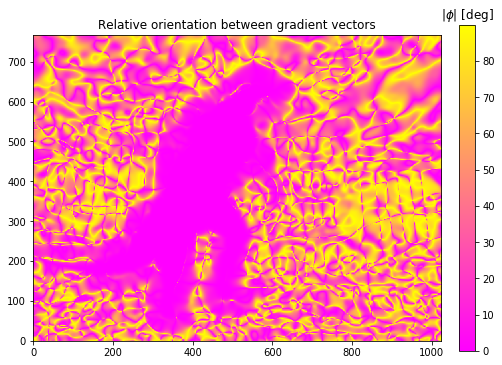

In [13]:
#
fig, ax = plt.subplots(1,1, figsize=(8., 6.))
im=plt.imshow(np.abs(corrcube[indmax1[0],indmax2[0],:,:])*180.0/np.pi, origin='lower', cmap='spring',interpolation='None')
cbl=plt.colorbar(im,fraction=0.046, pad=0.04)
cbl.ax.set_title(r'$|\phi|$ [deg]')
ax.set_title('Relative orientation between gradient vectors')
plt.show()

In [14]:
vblocks=imablockaverage(corrcube[indmax1[0],indmax2[0],:,:], nbx=7, nby=10, weight=(1./ksz)**2)

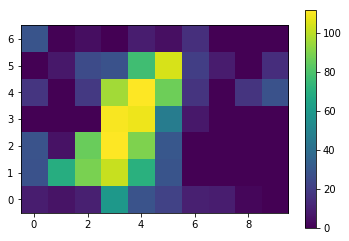

In [15]:
plt.imshow(vblocks, origin='lower', vmin=0.)
plt.colorbar()
plt.show()